<a href="https://colab.research.google.com/github/DoreenDoreen/Landing-Club-Loan-Prediction/blob/main/Landing_Club_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Landing Club Loan Prediction Project



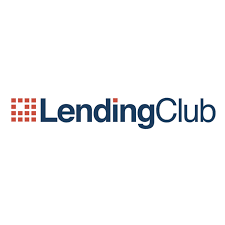

LendingClub is a US company based in San Francisco that connects people who need loans with investors through an online platform. It was the first peer-to-peer lender to register with the Securities and Exchange Commission (SEC) and allow loans to be traded on a secondary market.

## Project Overview
####   Part 0: Setup Google Drive Environment
####   Part 1: Data Exploration
####   Part 2: Data Cleaning and Feature Preprocessing
####   Part 3: Model Training and Selection
####   Part 4: Feature Importance

## Part 0: Setup Google Drive Environment

In [1]:
import pandas as pd
import numpy as np

from tabulate import tabulate


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '1pFXP1H8607anOIVfOYxs03zMa1ehA0ow'
file = drive.CreateFile({'id':id})
file.GetContentFile('loan-clean-version.csv')
LC_df  = pd.read_csv('loan-clean-version.csv')
LC_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


## Part 1: Data Exploration

##full description of each fields:

LoanStatNew	 | Description
--- | ---
zip_code	|The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state	|The state provided by the borrower in the loan application
annual_inc|	The annual income provided by the borrower during registration.
collection_recovery_fee |	post charge off collection fee
collections_12_mths_ex_med |	Number of collections in 12 months excluding medical collections
delinq_2yrs	|The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years
desc |	Loan description provided by the borrower
dti	| A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line	|The month the borrower’s earliest reported credit line was opened
emp_length|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
emp_title|	The job title supplied by the Borrower when applying for the loan.
fico_range_high	|The upper boundary of range the borrower’s FICO belongs to.
fico_range_low|	The lower boundary of range the borrower’s FICO belongs to.
funded_amnt |	The total amount committed to that loan at that point in time.
funded_amnt_inv|	The total amount committed by investors for that loan at that point in time.
grade |	LC assigned loan grade
home_ownership|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
id |	A unique LC assigned ID for the loan listing.
initial_list_status |	The initial listing status of the loan. Possible values are – W, F
inq_last_6mths |	The number of inquiries by creditors during the past 6 months.
installment	| The monthly payment owed by the borrower if the loan originates.
int_rate |	Interest Rate on the loan
is_inc_v |	Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d	 | The month which the loan was funded
last_credit_pull_d |	The most recent month LC pulled credit for this loan
last_fico_range_high |	The last upper boundary of range the borrower’s FICO belongs to pulled.
last_fico_range_low |	The last lower boundary of range the borrower’s FICO belongs to pulled.
last_pymnt_amnt	| Last total payment amount received
last_pymnt_d |	Last month payment was received
loan_amnt |	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loan_status |	Current status of the loan
member_id |	A unique LC assigned Id for the borrower member.
mths_since_last_delinq	| The number of months since the borrower’s last delinquency.
mths_since_last_major_derog	| Months since most recent 90-day or worse rating
mths_since_last_record |	The number of months since the last public record.
next_pymnt_d	| Next scheduled payment date
open_acc	| The number of open credit lines in the borrower’s credit file.
out_prncp |	Remaining outstanding principal for total amount funded
out_prncp_inv	| Remaining outstanding principal for portion of total amount funded by investors
policy_code |	Publicly available policy_code=1, new products not publicly available policy_code=2
pub_rec	|Number of derogatory public records
purpose	| A category provided by the borrower for the loan request.
pymnt_plan |	Indicates if a payment plan has been put in place for the loan
recoveries |	post charge off gross recovery
revol_bal |	Total credit revolving balance
revol_util|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
sub_grade |	LC assigned loan subgrade
term	| The number of payments on the loan. Values are in months and can be either 36 or 60.
title |	The loan title provided by the borrower
total_acc	| The total number of credit lines currently in the borrower’s credit file
total_pymnt	|Payments received to date for total amount funded
total_pymnt_inv |	Payments received to date for portion of total amount funded by investors
total_rec_int	| Interest received to date
total_rec_late_fee|	Late fees received to date
total_rec_prncp	| Principal received to date
url	| URL for the LC page with listing data.

### 1.1 Understand the raw dataset

In [2]:
# Dataset Preview
LC_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


In [3]:
LC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   object 
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   object 
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   object 
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   object 
 12  purpose              9004 non-null   object 
 13  addr_state           9004 non-null   object 
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

In [4]:
LC_df.nunique()

,0
id,9004
loan_amnt,604
funded_amnt,681
funded_amnt_inv,1234
term,2
int_rate,70
installment,3871
grade,7
emp_length,11
home_ownership,3


In [5]:
# Check missing value
LC_df.isnull().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
emp_length,316
home_ownership,0


In [6]:
# Check the distribution of target variable
LC_df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,7487
Charged Off,1517


### 1.2 EDA

In [7]:
# correlation heatmap of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
numCol = []
for col in LC_df:
  if LC_df[col].dtype == 'float':
    numCol.append(col)

corr = LC_df[numCol].corr()
corr

,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
funded_amnt_inv,1.000000,0.302945,0.959195,0.371554,0.025192,0.022395,0.884368,0.885395,0.829373,0.734486
int_rate,0.302945,1.000000,0.267857,0.076103,0.091614,0.470893,0.259296,0.258493,0.124425,0.531955
installment,0.959195,0.267857,1.000000,0.385192,0.017451,0.056484,0.859719,0.859358,0.827792,0.660184
annual_inc,0.371554,0.076103,0.385192,1.000000,-0.176920,-0.005319,0.366455,0.364869,0.365577,0.253143
dti,0.025192,0.091614,0.017451,-0.176920,1.000000,0.243479,0.020130,0.019860,-0.004552,0.077365
revol_util,0.022395,0.470893,0.056484,-0.005319,0.243479,1.000000,0.022241,0.024014,-0.036570,0.171383
total_pymnt,0.884368,0.259296,0.859719,0.366455,0.020130,0.022241,1.000000,0.998224,0.968533,0.795019
total_pymnt_inv,0.885395,0.258493,0.859358,0.364869,0.019860,0.024014,0.998224,1.000000,0.966596,0.794365
total_rec_prncp,0.829373,0.124425,0.827792,0.365577,-0.004552,-0.036570,0.968533,0.966596,1.000000,0.634057
total_rec_int,0.734486,0.531955,0.660184,0.253143,0.077365,0.171383,0.795019,0.794365,0.634057,1.000000


[Text(0.5, 0, 'funded_amnt_inv'),
 Text(1.5, 0, 'int_rate'),
 Text(2.5, 0, 'installment'),
 Text(3.5, 0, 'annual_inc'),
 Text(4.5, 0, 'dti'),
 Text(5.5, 0, 'revol_util'),
 Text(6.5, 0, 'total_pymnt'),
 Text(7.5, 0, 'total_pymnt_inv'),
 Text(8.5, 0, 'total_rec_prncp'),
 Text(9.5, 0, 'total_rec_int')]

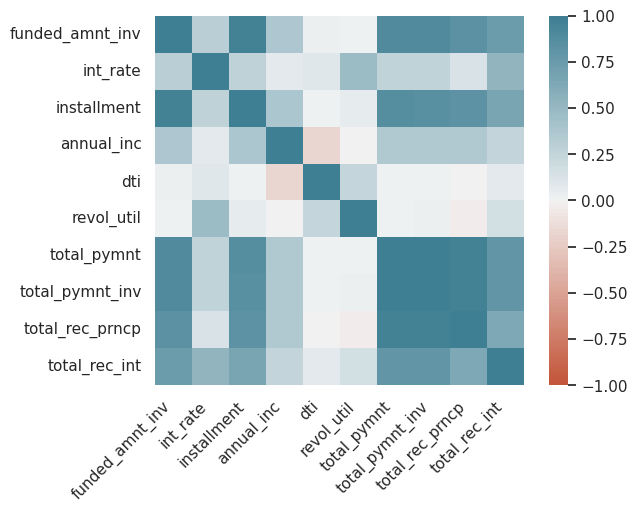

In [9]:
sns.set()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

From the Heatmap and correlation table, some corresponding features (like total_pymnt and total_pymnt_inv) have high correlation.

<Axes: xlabel='purpose'>

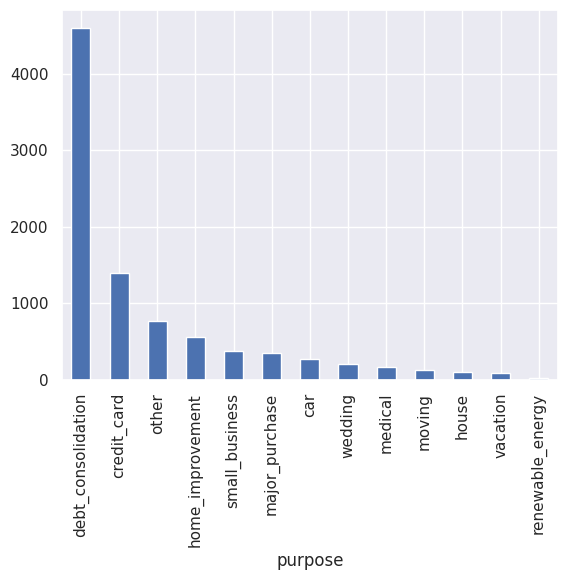

In [10]:
# explore purpose category
LC_df['purpose'].value_counts().plot(kind='bar')

<Axes: title={'center': 'LC Loan Amount Distribution'}, xlabel='loan_amnt'>

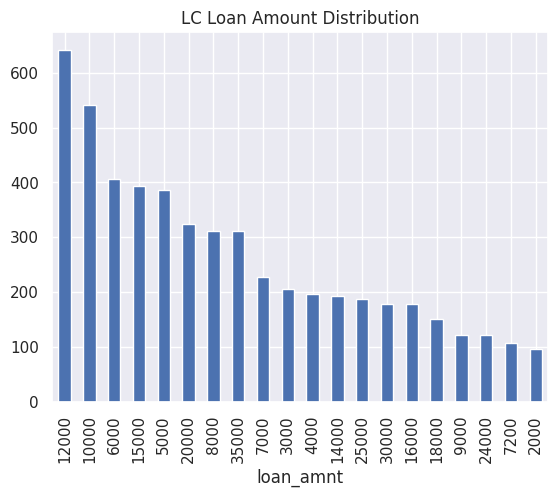

In [11]:
# explore loan_amount category
LC_df['loan_amnt'].value_counts()[:20].plot(kind='bar', title='LC Loan Amount Distribution')

<Axes: xlabel='home_ownership'>

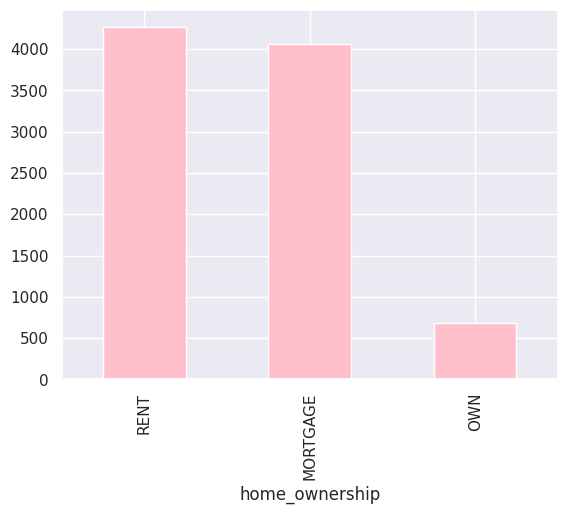

In [12]:
LC_df["home_ownership"].value_counts().plot(kind='bar', color='pink')

<Axes: ylabel='count'>

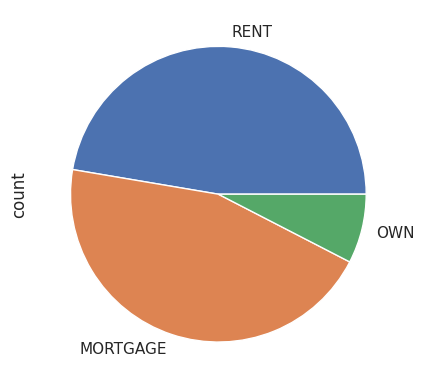

In [13]:
LC_df["home_ownership"].value_counts().plot(kind='pie')

<Axes: xlabel='emp_length'>

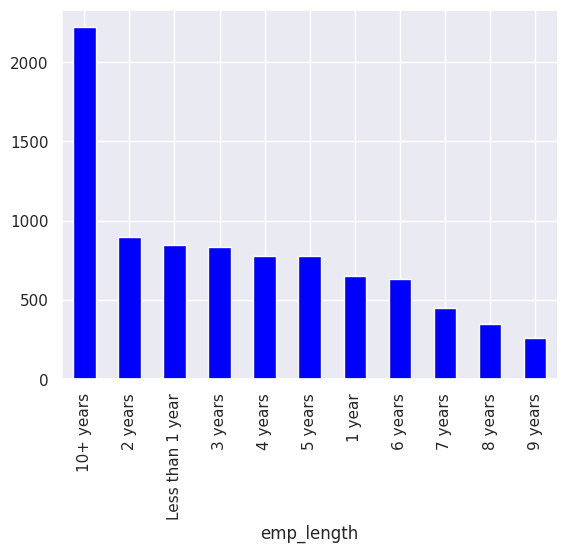

In [14]:
LC_df["emp_length"].value_counts().plot(kind='bar', color='blue')

In [15]:
# total loan amount issued by state
df_location = LC_df.groupby('addr_state').sum().reset_index()
df_location = df_location.filter(['addr_state', 'loan_amnt'], axis=1)
df_location.head()

,addr_state,loan_amnt
0,AK,359675
1,AL,1308425
2,AR,753275
3,AZ,2477200
4,CA,20470425


In [16]:
# Create a US map to show the loan_amnt for each state in addr_state column
import plotly.graph_objects as go

In [17]:
fig = go.Figure(data = go.Choropleth(
    locations = df_location['addr_state'],
    z = df_location['loan_amnt'],
    locationmode = 'USA-states',
    colorscale = 'Viridis',
    autocolorscale = False
))

fig.update_layout(
    title_text = 'Total Loan Amount Issued by State',
    geo = dict(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(85,173,240)',
        subunitwidth = 1,
        subunitcolor = 'white'
    )
)

fig.show()

<Axes: xlabel='grade', ylabel='count'>

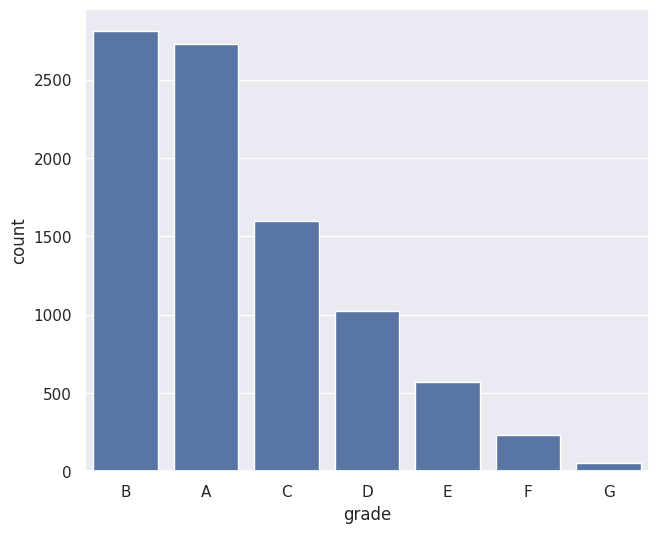

In [18]:
# grade distribution plot
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= LC_df, order = LC_df['grade'].value_counts().index)

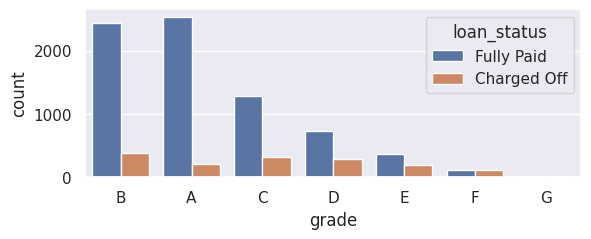

In [19]:
# prompt: generate bar chart to compare LC_df, based on loan_status, and separated by grade.

plt.subplot(2, 1, 1)
sns.countplot(x="grade", data= LC_df, hue="loan_status", order = LC_df['grade'].value_counts().index)
plt.show()

<Axes: xlabel='loan_status', ylabel='count'>

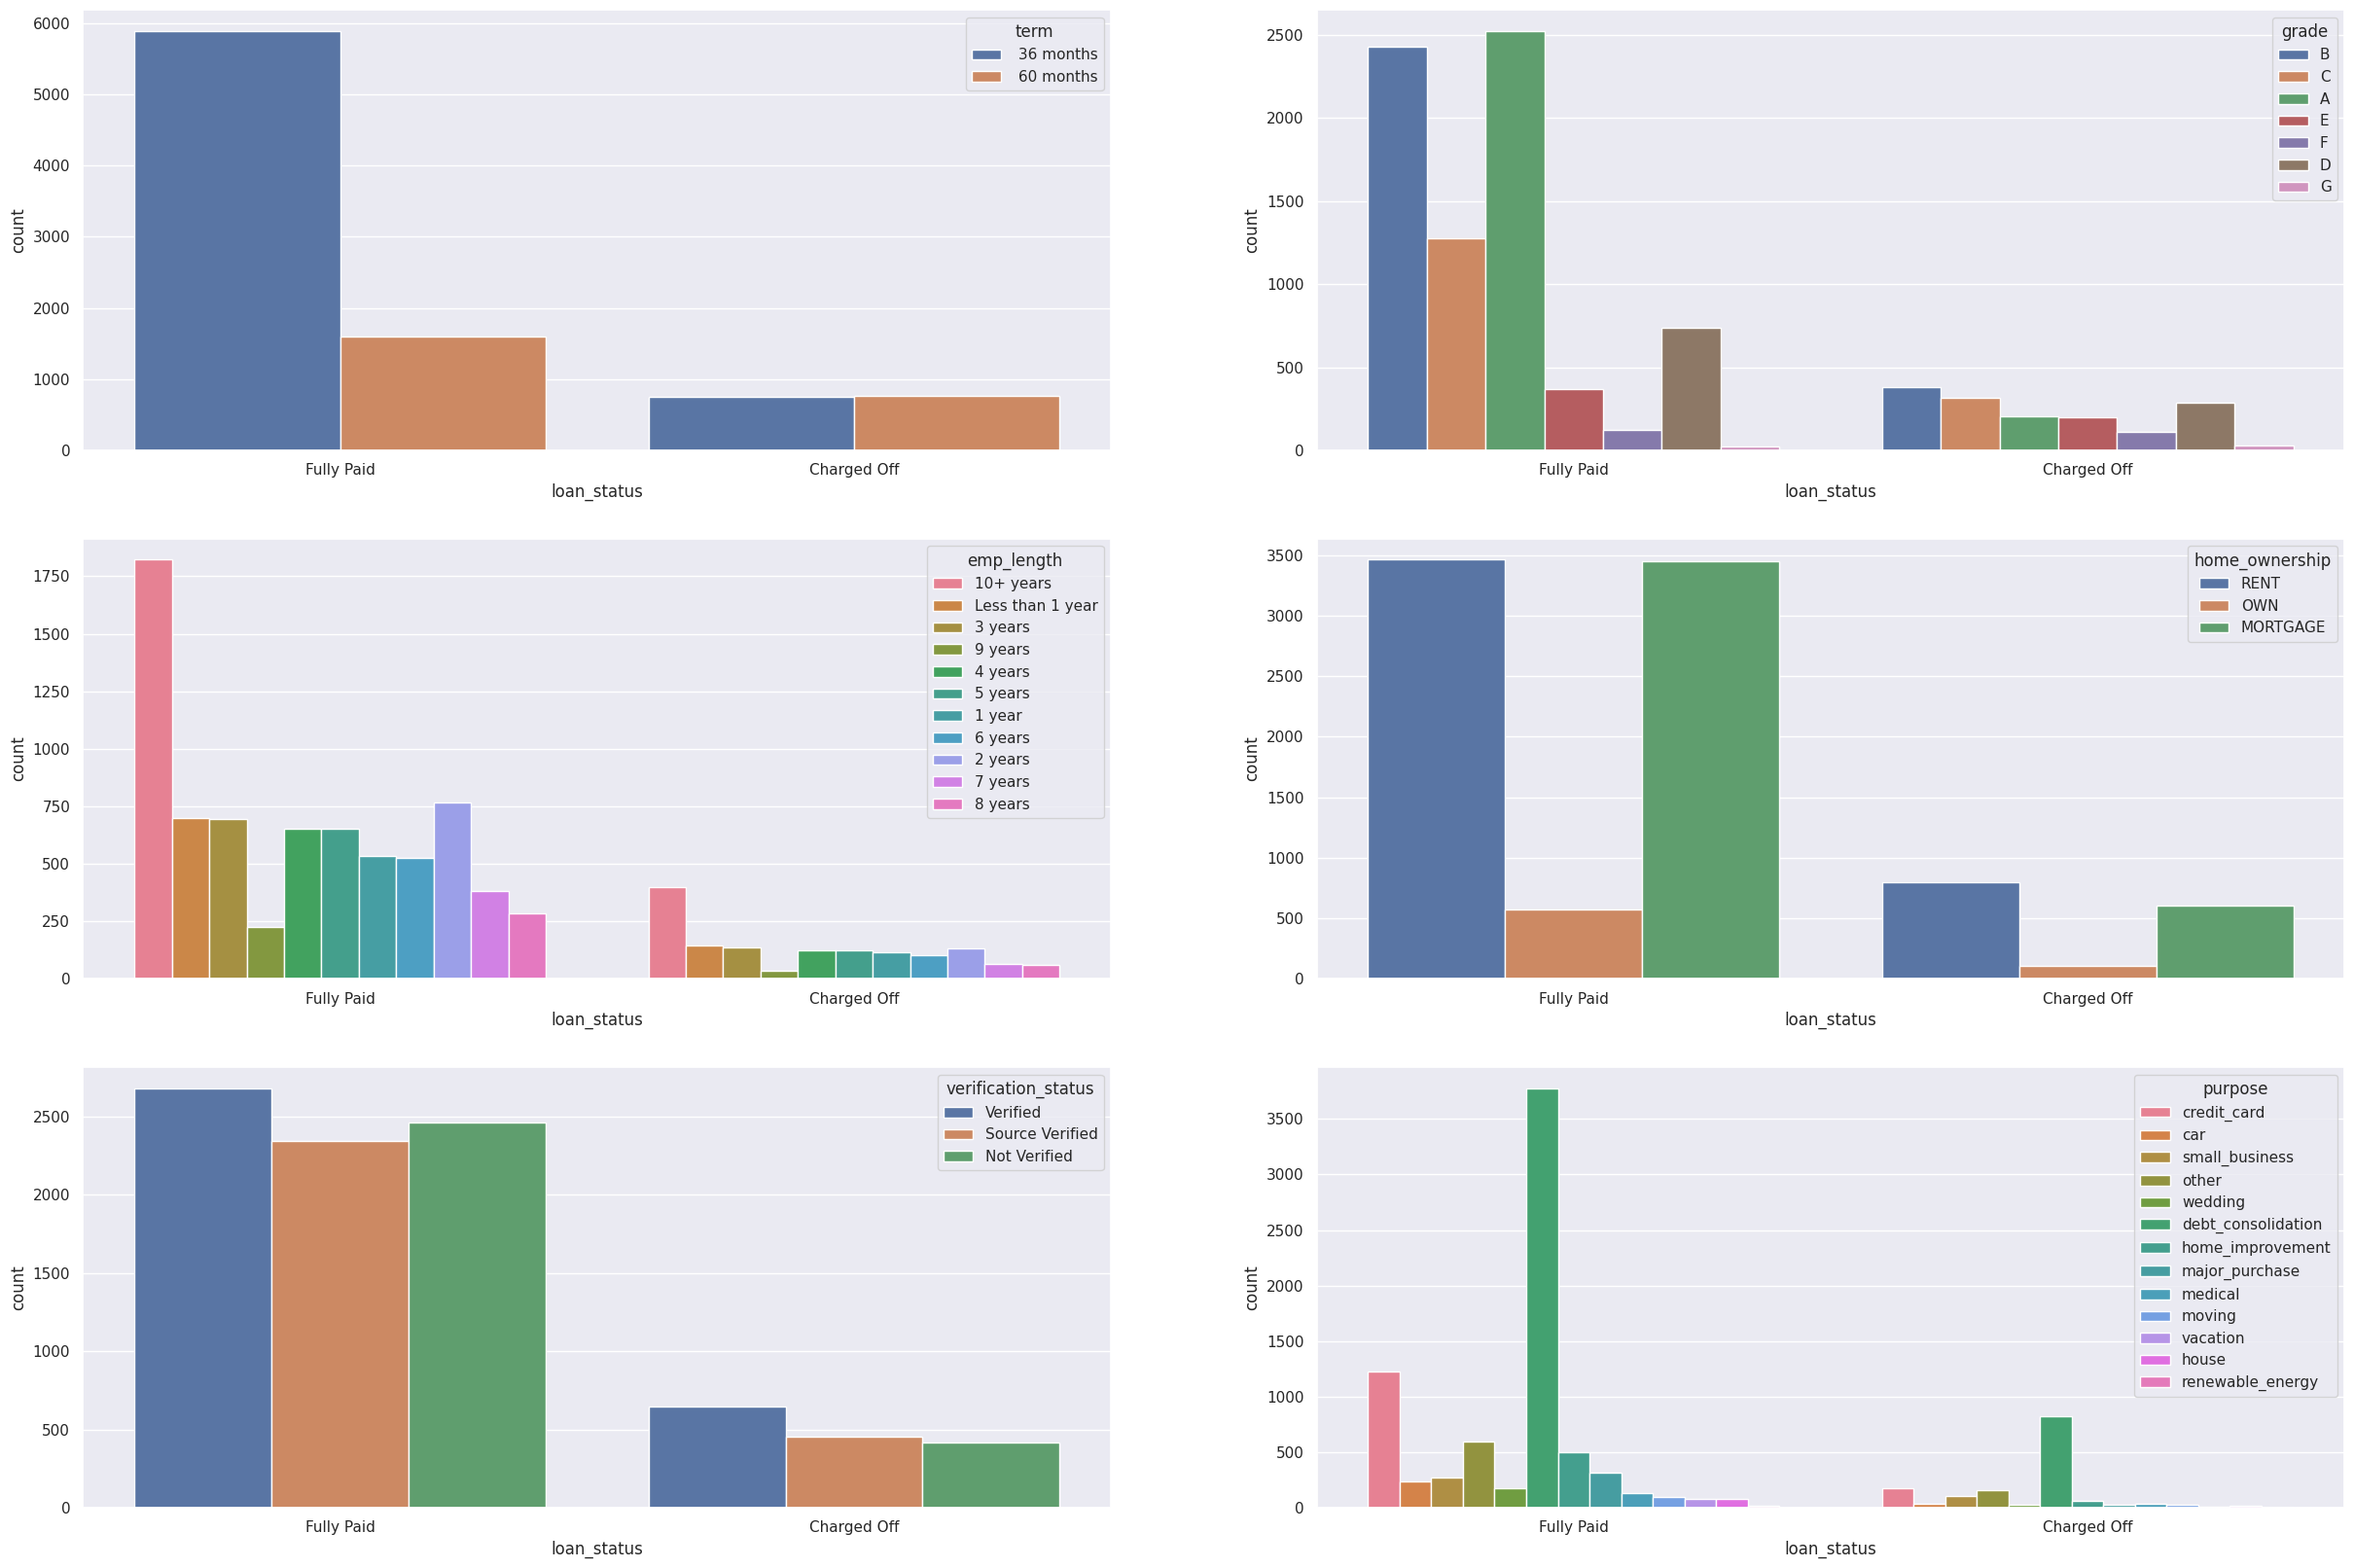

In [20]:
_,axss = plt.subplots(3,2, figsize=[30,20])
sns.countplot(x='loan_status', hue='term', data=LC_df, ax=axss[0][0])
sns.countplot(x='loan_status', hue='grade', data=LC_df, ax=axss[0][1])
sns.countplot(x='loan_status', hue='emp_length', data=LC_df, ax=axss[1][0])
sns.countplot(x='loan_status', hue='home_ownership', data=LC_df, ax=axss[1][1])
sns.countplot(x='loan_status', hue='verification_status', data=LC_df, ax=axss[2][0])
sns.countplot(x='loan_status', hue='purpose', data=LC_df, ax=axss[2][1])

## Part 2: Data cleaning and Feature Preprocessing

### Data Description

In [21]:
LC_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,9.004000e+03,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9.004000e+03,9004.000000,9004.000000,9004.000000,...,9004.000000,9004.000000,9001.000000,9004.000000,9004.0,9004.0,9004.000000,9004.000000,9004.000000,9004.000000
mean,9.632337e+05,12291.884163,12154.156486,12076.054639,12.126728,357.478229,6.957693e+04,13.889958,37300.462794,0.857175,...,0.047423,13658.416148,52.368789,22.438583,0.0,0.0,13037.547635,12943.841207,10563.492623,2328.716827
std,7.953238e+04,8285.682170,8096.937145,8033.211335,4.195740,227.180439,4.885841e+04,6.609968,4379.652217,1.043980,...,0.215667,15038.825421,27.644807,11.146531,0.0,0.0,9838.298075,9743.909609,7946.456673,2650.982007
min,4.581650e+05,1000.000000,1000.000000,750.000000,5.420000,30.160000,6.000000e+03,0.000000,19998.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.778840e+05,6000.000000,6000.000000,6000.000000,8.490000,187.750000,4.200000e+04,8.860000,34455.000000,0.000000,...,0.000000,4559.750000,30.500000,14.000000,0.0,0.0,5802.197477,5779.940000,4800.000000,682.042500
50%,9.879685e+05,10000.000000,10000.000000,10000.000000,11.710000,312.910000,6.000000e+04,13.940000,36161.000000,1.000000,...,0.000000,9889.000000,54.700000,21.000000,0.0,0.0,10623.210000,10577.545000,8650.000000,1367.130000
75%,1.033607e+06,16000.000000,16000.000000,15975.000000,15.230000,469.360000,8.300000e+04,19.082500,42827.000000,1.000000,...,0.000000,17468.250000,75.000000,29.000000,0.0,0.0,17354.405075,17225.490000,14500.000000,2881.767500
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.110000,1288.100000,1.782000e+06,29.920000,43076.000000,8.000000,...,2.000000,148804.000000,99.900000,79.000000,0.0,0.0,56809.051630,56475.050000,35000.010000,21809.050000


### Data Cleaning

In [22]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['term']))}
LC_df['term'] = LC_df['term'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['grade']))}
LC_df['grade'] = LC_df['grade'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['home_ownership']))}
LC_df['home_ownership'] = LC_df['home_ownership'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['verification_status']))}
LC_df['verification_status'] = LC_df['verification_status'].map

class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['purpose']))}
LC_df['purpose'] = LC_df['purpose'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['addr_state']))}
LC_df['addr_state'] = LC_df['addr_state'].map(class_mapping)

class_mapping = {'Fully Paid' : 0, 'Charged Off' : 1}
LC_df['loan_status'] = LC_df['loan_status'].map(class_mapping)

LC_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,0,10.65,162.87,1,10+ years,2,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,0
1,1077430,2500,2500,2500.0,1,15.27,59.83,2,Less than 1 year,2,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,1
2,1077175,2400,2400,2400.0,0,15.96,84.33,2,10+ years,2,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,0
3,1076863,10000,10000,10000.0,0,13.49,339.31,2,10+ years,2,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,0
4,1075269,5000,5000,5000.0,0,7.90,156.46,0,3 years,2,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,0


In [23]:
# deal with missing value
LC_df = LC_df.select_dtypes(include=[np.number]).interpolate().dropna()

# drop high correlation and high variance columns
LC_df = LC_df.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'id', 'total_rec_prncp'], axis=1)
LC_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,loan_status
0,5000,5000,4975.0,0,10.65,162.87,1,2,24000.0,1,...,31048,1,3,0,13648,83.7,9,0,0,0
1,2500,2500,2500.0,1,15.27,59.83,2,2,30000.0,0,...,36251,5,3,0,1687,9.4,4,0,0,1
2,2400,2400,2400.0,0,15.96,84.33,2,2,12252.0,10,...,43040,2,2,0,2956,98.5,10,0,0,0
3,10000,10000,10000.0,0,13.49,339.31,2,2,49200.0,8,...,35096,1,10,0,5598,21.0,37,0,0,0
4,5000,5000,5000.0,0,7.90,156.46,0,2,36000.0,12,...,43043,3,9,0,7963,28.3,12,0,0,0


### Data Split

In [24]:
# split dataset
from sklearn.model_selection import train_test_split

yPredict = LC_df['loan_status']
XClean = LC_df.drop(['loan_status'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=42, test_size=.25)

In [25]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
7442,14400,14400,14400.0,1,19.29,375.85,4,1,150000.0,7,...,4.88,43009,1,8,0,3859,52.8,26,0,0
8145,7000,7000,7000.0,0,5.42,211.12,0,1,45000.0,2,...,7.36,42738,0,8,0,11237,68.9,16,0,0
1434,1325,1325,1325.0,0,6.62,40.69,0,1,39456.0,8,...,26.22,36557,1,9,0,10791,43.8,29,0,0
2777,12000,12000,12000.0,0,6.62,368.45,0,2,60000.0,2,...,8.86,36161,1,9,0,10170,23.8,29,0,0
1867,16000,16000,15975.0,1,15.27,382.92,2,0,45200.0,2,...,19.67,33482,3,7,0,14750,58.5,17,0,0


In [26]:
y_train.head()

,loan_status
7442,0
8145,0
1434,0
2777,1
1867,0


### Data Preprocessing

In [27]:
# Transform file
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 3: Model Training and Selection

### 3.1: Random Forest / KNN / Logistic Regression

#### 3.1.1. Build Models

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [30]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [32]:
prediction_Regression = classifier_logistic.predict(X_test)
print(classification_report(y_test, prediction_Regression))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1872
           1       0.60      0.06      0.10       379

    accuracy                           0.83      2251
   macro avg       0.72      0.52      0.51      2251
weighted avg       0.80      0.83      0.77      2251



In [33]:
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
pridiction_KNN = classifier_KNN.predict(X_test)
print(classification_report(y_test, pridiction_KNN))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1872
           1       0.50      0.17      0.25       379

    accuracy                           0.83      2251
   macro avg       0.68      0.57      0.58      2251
weighted avg       0.79      0.83      0.80      2251



In [35]:
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
prediction_RF = classifier_RF.predict(X_test)
print(classification_report(y_test, prediction_RF))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1872
           1       0.50      0.07      0.12       379

    accuracy                           0.83      2251
   macro avg       0.67      0.53      0.51      2251
weighted avg       0.78      0.83      0.77      2251



#### 3.1.2. Cross Validation

In [38]:
# Use 5-fold Cross Validation to get the accuracy for different models
from sklearn import model_selection

In [39]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.83123612 0.83271651 0.83863805 0.82666667 0.8362963 ]
Model accuracy of Logistic Regression is 0.8331107273076185
[0.80458919 0.80903035 0.80754996 0.80814815 0.81259259]
Model accuracy of KNN is 0.8083820489623598
[0.83271651 0.82235381 0.82679497 0.8237037  0.83333333]
Model accuracy of Random Forest is 0.8277804644022261


Logistic Regression has the best performance in these three models

### 3.2. Other models - SVM

In [40]:
from sklearn.svm import SVC

In [41]:
classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print(cv_score)
print('Model accuracy of SVC is ' + str(cv_score.mean()))

[0.83197631 0.83197631 0.83197631 0.83259259 0.83259259]
Model accuracy of SVC is 0.8322228253419963


### 3.3. Other models - Nerual Network

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30))
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [44]:
pridictions = mlp.predict(X_test)

In [45]:
print(confusion_matrix(y_test, pridictions))

[[1725  147]
 [ 294   85]]


In [46]:
print(classification_report(y_test, pridictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1872
           1       0.37      0.22      0.28       379

    accuracy                           0.80      2251
   macro avg       0.61      0.57      0.58      2251
weighted avg       0.77      0.80      0.78      2251



## Part 4: Feature Importance

In [47]:
X_with_corr = XClean.copy()
X_with_corr.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
0,5000,5000,4975.0,0,10.65,162.87,1,2,24000.0,1,...,27.65,31048,1,3,0,13648,83.7,9,0,0
1,2500,2500,2500.0,1,15.27,59.83,2,2,30000.0,0,...,1.00,36251,5,3,0,1687,9.4,4,0,0
2,2400,2400,2400.0,0,15.96,84.33,2,2,12252.0,10,...,8.72,43040,2,2,0,2956,98.5,10,0,0
3,10000,10000,10000.0,0,13.49,339.31,2,2,49200.0,8,...,20.00,35096,1,10,0,5598,21.0,37,0,0
4,5000,5000,5000.0,0,7.90,156.46,0,2,36000.0,12,...,11.20,43043,3,9,0,7963,28.3,12,0,0


In [48]:
y = yPredict.copy()

In [55]:
# Check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_with_corr, y)

importances = forest.feature_importances_

feature_name = X_with_corr.columns.values

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(XClean.shape[1]):
    print("{0} : {1}".format(XClean.columns[indices[ind]], round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
annual_inc : 0.0827
revol_util : 0.0799
dti : 0.0783
int_rate : 0.0781
earliest_cr_line : 0.0769
revol_bal : 0.076
installment : 0.0655
total_acc : 0.0622
addr_state : 0.0556
funded_amnt_inv : 0.0544
open_acc : 0.0487
funded_amnt : 0.0457
loan_amnt : 0.0452
purpose : 0.0372
term : 0.0329
grade : 0.0329
inq_last_6mths : 0.0257
home_ownership : 0.0159
pub_rec : 0.0061
out_prncp : 0.0
out_prncp_inv : 0.0


<Figure size 640x480 with 0 Axes>

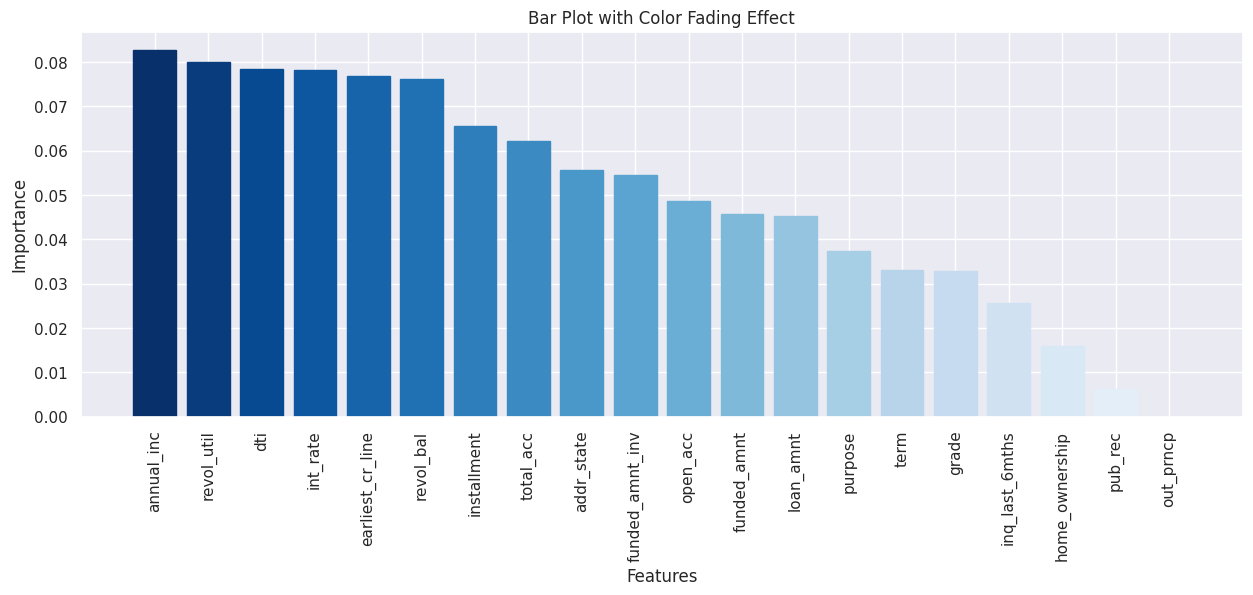

In [62]:
# Feature Importance Visualization - RF
plt.figure(1)
plt.figure(figsize = [15,5])

bars = plt.bar(feature_name[indices[:20]], importances[indices[:20]])

# Create color fading effect
base_color = plt.cm.Blues(0.5)
faded_colors = [plt.cm.Blues(1 - i/len(importances[indices[:20]])) for i in range(len(importances[indices[:20]]))]

for bar, color in zip(bars, faded_colors):
    bar.set_color(color)


plt.xticks(rotation=90)  # control the rotation direction of label as 90 degree
plt.title('Bar Plot with Color Fading Effect')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [69]:
# Add L1 regularization to logistic regression
# check the coefficients for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty='l1', C=10, solver='liblinear')
LRmodel_l1.fit(X_l1, yPredict)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

# Print the feature ranking
print("Logistic Regression (l1) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print("{0} : {1}".format(X_with_corr.columns[indices[ind]], round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (l1) Coefficients
int_rate : 0.5472
annual_inc : -0.5
term : 0.4089
funded_amnt : -0.3745
funded_amnt_inv : 0.2863
purpose : 0.2047
revol_util : 0.1488
loan_amnt : 0.1091
grade : -0.1074
inq_last_6mths : 0.0993
home_ownership : 0.0763
earliest_cr_line : -0.0625
addr_state : -0.0606
open_acc : 0.0599
pub_rec : 0.0596
total_acc : -0.0536
installment : 0.0402
dti : 0.0234
revol_bal : -0.003
out_prncp : 0.0
out_prncp_inv : 0.0


<Figure size 640x480 with 0 Axes>

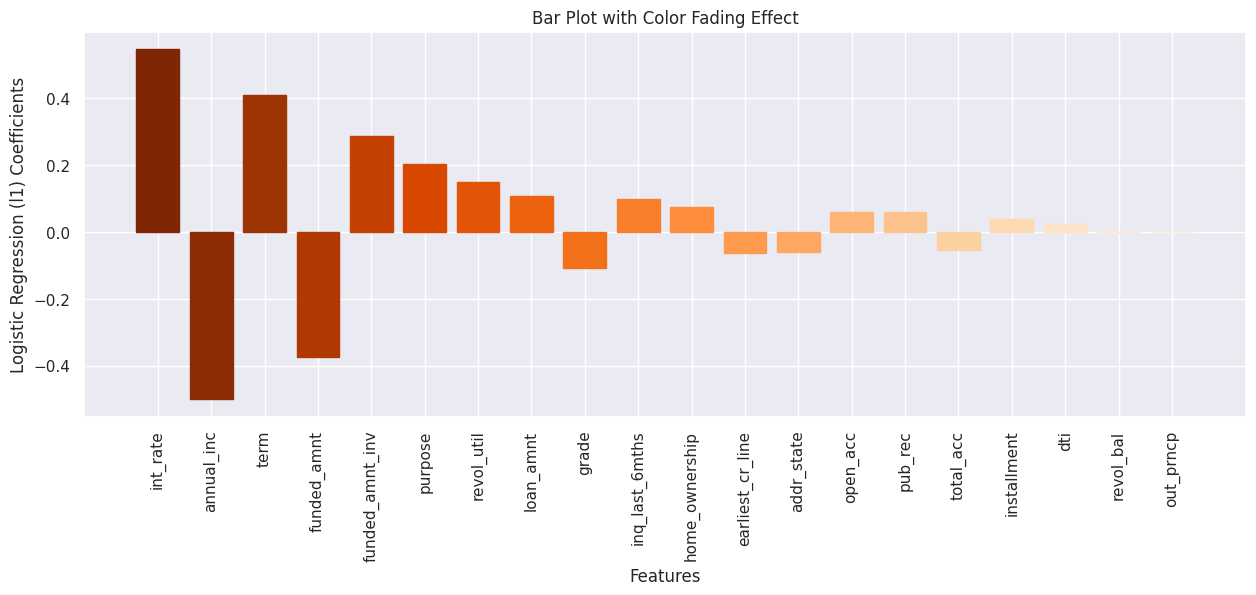

In [70]:
# Feature Ranking Visualization - Logistic Regression (l1) Coefficients
plt.figure(1)
plt.figure(figsize = [15,5])

bars = plt.bar(feature_name[indices[:20]], LRmodel_l1.coef_[0][indices[:20]])

# Create color fading effect
base_color = plt.cm.Oranges(0.5)
faded_colors = [plt.cm.Oranges(1 - i/len(importances[indices[:20]])) for i in range(len(importances[indices[:20]]))]

for bar, color in zip(bars, faded_colors):
    bar.set_color(color)


plt.xticks(rotation=90)  # control the rotation direction of label as 90 degree
plt.title('Bar Plot with Color Fading Effect')
plt.xlabel('Features')
plt.ylabel('Logistic Regression (l1) Coefficients')
plt.show()

## Discussion:
1. The most important common feature is the annual income provided by the borrower during registration. A higher annual income is associated with a lower likelihood of the loan being charged off.

2. The second most important common feature is the interest rate on the loan. A higher interest rate increases the likelihood of the loan being charged off.

3. The third important common feature is the revolving line utilization rate, which refers to the amount of credit the borrower is using relative to their total available revolving credit.